# CSCI 3202, Spring 2020

# Friday 21 February 2020

# In-class notebook:  Games

<a id='top'></a>

<br>

Before we begin, let's load a few packages that we might find useful.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp

<br>

<div>
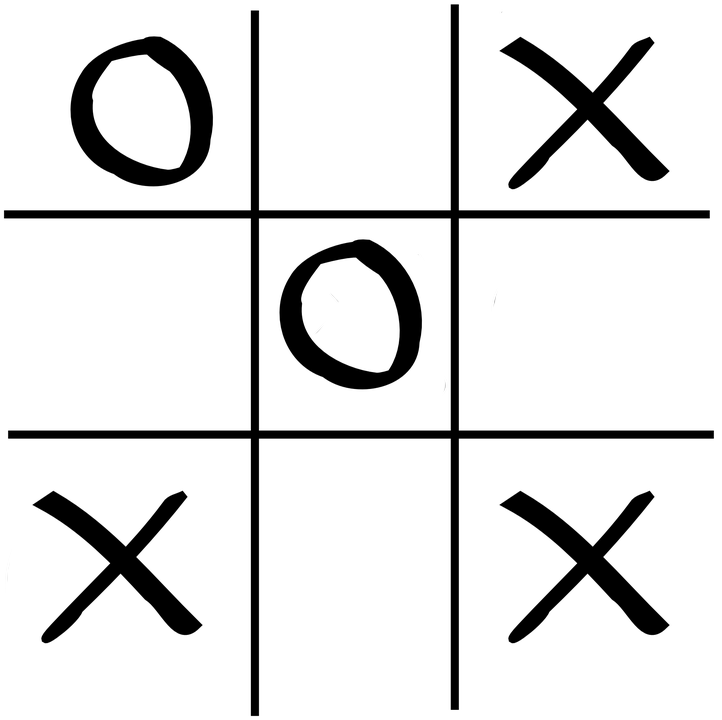
</div>

# Tic-Tac-Toe

Today, the goal is to get an operational `TicTacToe` class, and - aspirationally - play games using `random_player`s.  We know that if many, many games are played between two random players, the one who goes first should win about 58% of the time, so that is our benchmark... once we get there.

Let's start by defining a Tic-Tac-Toe board `State` class.  This class includes everything we need to know about the board:
* whose move is it? (`to_move`)
* has anyone won yet? (`utility`)
* what marks are on the board? (`board`, a dictionary that we can modify so the keys are tuples representing a location on the board, and the values are the player, 'X' or 'O', occupying those locations)
* what moves are left to be made? (`moves`, a list of tuples representing vacant board locations)

Note that we used the `copy` method so that when we modify what moves are left, we do not tamper with the original `moves` object in memory.

Have a look at the image above the "Tic-Tac-Toe" header.  How would we represent that state?

Well, of course we need to construct a `State` first (which we just did).  We'll also need the list of initially available `moves`.  Let's use row/column (matrix-esque) notation.  So (1,1) represents the O in the upper-left, there is another O at (2,2) in the center square, and X's are in (1,3), (3,1) and (3,3).

This means the list of initially available moves is:



### Board and game state

Now we need to modify the board.  Each time a player makes a mark on the board, one of the potential moves has been taken and must be removed from the list, and we need to update whose move it is.  I will add the first move - you do the rest!

In [1]:
state = State(moves_initial)
move = (1,3)
state.board[move] = 'X'
state.moves.remove(move)
state.to_move = 'O' if state.to_move=='X' else 'X'

print(state.board)

NameError: name 'State' is not defined

Since it is awfully tedious to keep re-running the same snippet of code, let's define a function to do it for us.

In [5]:
def result(move, state):
    '''
    What is the hypothetical result of move `move` in state `state` ?
    move  = (row, col) tuple where player will put their mark (X or O)
    state = a `State` object, to represent whose turn it is and form
            the basis for generating a **hypothetical** updated state
            that will result from making the given `move`
    '''
    # First, create a copy of the given state. We use `deepcopy` so
    # that we do not prematurely tamper with the actual current 
    # Tic-Tac-Toe state, since we mostly use this method
    # to get hypothetical results as we search our game tree, not
    # for actual moves.
    

### Utility

Now a game between two random players can be represented as a loop until either all available moves are taken up (`length(state.moves)==0`) ***or*** one of the players gets 3-in-a-row.  So now we need a function to check whether or not someone has achieved 3-in-a-row by making `move` in `state`.  I've given you some guidelines on how to return the computed `utility`, but there will be some modifications needed depending on how you implement this routine.

<img src="https://imgs.xkcd.com/comics/will_it_work.png" width="230"/>

A couple notes:
* For purposes of getting off the ground during class, there are only 8 possible ways in standard $3 \times 3$ Tic-Tac-Toe in which a player can win.  So it isn't too difficult to hard-code for this situation, if you are stumped. An example portion of this hard-coding solution is given as a comment below.
* You only need to check if the person who is making the `move` has just gotten 3-in-a-row, because the other player can't possibly have changed the utility since they have not moved.
* Remember that `compute_utility` is a **hypothetical** calculation.  We do **not** want to actually modify `state` yet because once we start using alpha-beta pruning, we will need to make judgments on how good numerous possible outcomes are *before* we execute our move and modify the state.
  * To do this, we can use a `deepcopy` of the state board, in which the new board object itself is essentially a new version of the old one and not attached in memory at all.  This line is given for you.

In [6]:
def compute_utility(move, state):
    '''Calculate the utility of making a given move in a given state.
    If X wins, utility is +1; if O wins, utility is -1; if it is a
    draw or nobody has won yet, then utility is 0.'''
    
    
    # create a hypothetical copy of the board, with 'move' executed


    # Example hard-coding line:
    # if (state.board.get((1,1))==state.to_move and
    #     state.board.get((1,2))==state.to_move and
    #     state.board.get((1,3))==state.to_move) or
    # ... continue with the other ways in which someone could win...

    
    # what are all the ways 'player' could with with 'move'?

    # check for row-wise win


    # check for column-wise win


    # check for NW->SE diagonal win


    # check for SW->NE diagonal win

    # your code goes here
    
    '''
    if # nobody has gotten 3-in-a-row
        return 0
    else:
        return 1 if state.to_move=='X' else -1
        '''    

We can test out our `compute_utility` method by having O make a move in the (1,2) square, and then checking if someone has won yet:

In [7]:
move = (1,2)

# the utility is a *hypothetical* calculation
new_utility = compute_utility(move, state)

# make the actual state update
state = result(move, state)
state.utility = new_utility

# we should stop playing our game once someone has won (i.e., utility != 0)
print('Has someone won yet? {}'.format(state.utility!=0))

Has someone won yet? False


It seems like updating the utility via `compute_utility` really ought to be a part of the `result` function, since the new utility is a direct result of the move.  Go back to add this to your `result` routine.

Now then.  What is the utility if we have X place its next mark at (2,3)?

In [8]:
move = (2,3)
state = result(move, state)

# we should stop playing our game once someone has won (i.e., utility != 0)
print('Has someone won yet? {}'.format(state.utility!=0))

Has someone won yet? True


Let's take our new function for a test drive by re-creating the state in the above picture.  Note that as long as I alternate X and O, the order of the moves is arbitrary (since we don't know in what order that image was created).

In [9]:
state = State(moves_initial)
state = result((1,3), state)
state = result((1,1), state)
state = result((3,1), state)
state = result((2,2), state)
state = result((3,3), state)

Verify that we get the expected results out of the new `state`:
* whose turn should it be?
* what moves are left?
* what does the board look like?

It sure would be easier to verify that the proper state had been generated if we had an appropriate helper function to visualize the Tic-Tac-Toe board as it appears in normal life, instead of as a dictionary.  Why, here's one now!  Test it out on the `state` you just generated above.  Note also that this is hard-coded for the $3\times 3$ case currently.

In [11]:
def display(state):
    for row in range(1, 4):
        for col in range(1, 4):
            print(state.board.get((row, col), '.'), end=' ')
        print()

In [12]:
display(state)

O . X 
. O . 
X . X 



### Players

Now let's create a player to play a random legal move in a given Tic-Tac-Toe game state.

In [13]:
def random_player(state):
    '''A player that chooses a legal move at random out of all
    available legal moves in Tic-Tac-Toe state argument'''
 
    # your code goes here...
    
    return random_move

Now it's time to define a function to play a game between two players. The function should take as arguments the function names for two players (so far, all we have are `random_player`s), and return the final state of the game.
* Start by initializing a new game `State`
* Alternate between players selecting a move and then applying that move to modify the game `state`
* After each player's move, you should have a check to see if the game is over.
* If the game is over, print to the screen the `state.board` and `state.utility`.

In [14]:
def play_game(player1, player2):



### Let's play a game!

Play a game of Tic-Tac-Toe between two random players. Let's see what happens...

In [15]:
state = play_game(random_player, random_player)
display(state)

X O X 
X O O 
X X O 


### Okay... let's play LOTS OF GAMES!

Now create a loop to play 1000 games of random vs random Tic-Tac-Toe.  Store the resulting utility of each match.  Remember, we are keeping track of the wins/losses of the player who goes first.  Check to making sure that this player's winning percentage is around 58%.

In [16]:
niter = 1000
wins = 0
draws = 0
losses = 0
for k in range(niter):
    out = play_game(random_player, random_player)
    if out.utility==1:
        wins += 1
    elif out.utility==-1:
        losses += 1
    else:
        draws += 1
        
print('First-player winning percentage = {}'.format(wins/niter))

First-player winning percentage = 0.564


### Now, let's repeat that, with organization!

And below is what we just did in a much more organized manner.

In [17]:
class State:
    def __init__(self, moves):
        self.to_move = 'X'
        self.utility = 0
        self.board = {}
        self.moves = moves

class TicTacToe:
    def __init__(self, nrow=3, ncol=3, nwin=3):
        self.nrow = nrow
        self.ncol = ncol
        self.nwin = nwin
        moves = [(row, col) for row in range(1, nrow + 1) for col in range(1, ncol + 1)]
        self.state = State(moves)

    def result(self, move, state):
        '''
        What is the hypothetical result of move `move` in state `state` ?
        move  = (row, col) tuple where player will put their mark (X or O)
        state = a `State` object, to represent whose turn it is and form
                the basis for generating a **hypothetical** updated state
                that will result from making the given `move`
        '''
        # Don't do anything if the move isn't a legal one
        if move not in state.moves:
            return state
        # Return a copy of the updated state:
        #   compute utility, update the board, remove the move, update whose turn
        new_state = cp.deepcopy(state)
        new_state.utility = self.compute_utility(move, state)
        new_state.board[move] = state.to_move
        new_state.moves.remove(move)
        new_state.to_move = ('O' if state.to_move == 'X' else 'X')
        return new_state

    def compute_utility(self, move, state):
        '''
        What is the utility of making move `move` in state `state`?
        If 'X' wins with this move, return 1;
        if 'O' wins return -1;
        else return 0.
        '''        
        row, col = move
        player = state.to_move
        
        # create a hypothetical copy of the board, with 'move' executed
        board = cp.deepcopy(state.board)
        board[move] = player

        # what are all the ways 'player' could with with 'move'?
        
        # check for row-wise win
        in_a_row = 0
        for c in range(1,self.ncol+1):
            in_a_row += board.get((row,c))==player

        # check for column-wise win
        in_a_col = 0
        for r in range(1,self.nrow+1):
            in_a_col += board.get((r,col))==player

        # check for NW->SE diagonal win
        in_a_diag1 = 0
        for r in range(row,0,-1):
            in_a_diag1 += board.get((r,col-(row-r)))==player
        for r in range(row+1,self.nrow+1):
            in_a_diag1 += board.get((r,col-(row-r)))==player

        # check for SW->NE diagonal win
        in_a_diag2 = 0
        for r in range(row,0,-1):
            in_a_diag2 += board.get((r,col+(row-r)))==player
        for r in range(row+1,self.nrow+1):
            in_a_diag2 += board.get((r,col+(row-r)))==player
        
        if self.nwin in [in_a_row, in_a_col, in_a_diag1, in_a_diag2]:
            return 1 if player=='X' else -1
        else:
            return 0

    def game_over(self, state):
        '''game is over if someone has won (utility!=0) or there
        are no more moves left'''
        return state.utility!=0 or len(state.moves)==0    

    def utility(self, state, player):
        '''Return the value to player; 1 for win, -1 for loss, 0 otherwise.'''
        return state.utility if player=='X' else -state.utility

    def display(self):
        board = self.state.board
        for row in range(1, self.nrow + 1):
            for col in range(1, self.ncol + 1):
                print(board.get((row, col), '.'), end=' ')
            print()

    def play_game(self, player1, player2):
        '''Play a game of tic-tac-toe!'''
        turn_limit = self.nrow*self.ncol  # limit in case of buggy code
        turn = 0
        while turn<=turn_limit:
            for player in [player1, player2]:
                turn += 1
                move = player(self)
                self.state = self.result(move, self.state)
                if self.game_over(self.state):
                    self.display()
                    return self.state.utility                
def random_player(game):
    '''A player that chooses a legal move at random.'''
    possible_actions = game.state.moves
    return possible_actions[np.random.randint(low=0, high=len(possible_actions))]



In [18]:
ttt = TicTacToe(3,3,3)
outcome = ttt.play_game(random_player, random_player)
outcome

X . O 
O O X 
O X X 


-1

Below is some code to help get you started with the first Homework problem (of HW3). You certainly don't have to use it, but I thought it might be helpful.

In [ ]:
def alphabeta_player(game):
    return alphabeta_search(game)

def alphabeta_search(game):
    '''search game approach to find best action, using alpha-beta pruning:
    alpha = best (highest) move found so far for Max
    beta  = best (lowest) move found so far for Min'''

    player = game.state.to_move

    # Functions used by alphabeta
    def max_value(state, alpha, beta):
        

    def min_value(state, alpha, beta):
        
    # Body of alphabeta_cutoff_search:

